# -----------------------CONVERSIÓN DIGITAL ANÁLOGA  --------------------

## Gustavo Arteaga 
## Universidad Nacional de Colombia - Facultad de minas 
## Tópicos Azanzados de Procesamiento Digital de Señales
### 2024-03-07

# ------------------------------------------------------------------------------

##  CONVERSIÓN DE SEÑALES ANALÓGICAS A FORMATO DIGITAL

## Diagrama De Bloques Conversión AD - DA
![DiagramaDeBloques](./img/DiagramaDeBloques.png)
Tomado de: *Fundamentos de sistemas digitales, 9a edición, www.librosite.net/floyd*
## Señal original y su proximación En Escalera
![AproximaciónEnEscalera](./img/AproximaciónEnEscalera.png)
Tomado de: *Fundamentos de sistemas digitales, 9a edición, www.librosite.net/floyd*
## Operación de muestreo y retención
![ProcesoDeMuestreo](./img/OperacionMuestreoRetencion.png)
Tomado de: *Fundamentos de sistemas digitales, 9a edición, www.librosite.net/floyd*




# SAMPLE & HOLD
![Circuit Diagram of Sample and Hold Circuit](https://electronicscoach.com/wp-content/uploads/2017/12/sample-and-hold-intro-diagram.jpg "Circuit Diagram of Sample and Hold Circuit")
## Diagrama del circuito de muestreo y retención
![Circuit Diagram of Sample and Hold Circuit](https://electronicscoach.com/wp-content/uploads/2017/12/Circuit-diagram-of-Sample-and-Hold-Circuit.jpg "Circuit Diagram of Sample and Hold Circuit")
## Forma de onda de entrada y salida
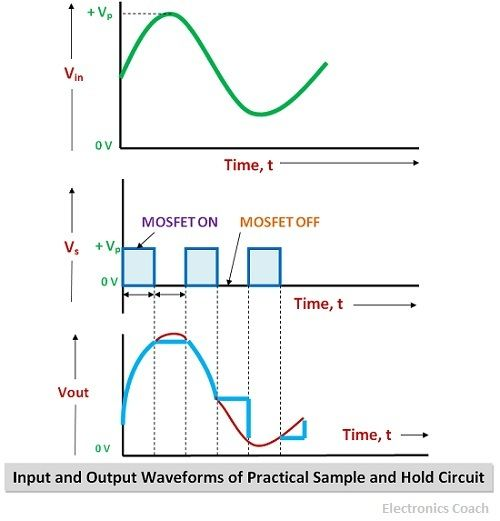
#
Tomado de: *https://electronicscoach.com/sample-and-hold-circuit.html*

# 🛠️👨🏻‍💻</>🔧 

## Generate analog signal

In [73]:
import numpy as np
import matplotlib.pyplot as plt

• frequency = 1: Define la frecuencia de la señal a 1 Hertz (Hz), lo que significa que la señal completa un ciclo completo cada segundo.

• sampling_rate = 100: Establece la tasa de muestreo a 100 Hz. Esto significa que se tomarán 100 muestras de la señal por segundo. La tasa de muestreo determina cuán frecuentemente se muestrea la señal analógica para convertirla en una forma digital.

• duration = 2: La duración de la señal es de 2 segundos.

• paso de 1/sampling_rate (0.01 segundos)

• La expresión 2 * np.pi * frequency * time calcula el ángulo (en radianes) para cada punto en el tiempo, necesario para generar la onda sinusoidal. Multiplicar la frecuencia por 2 * np.pi convierte la frecuencia de Hz a radianes por segundo.

In [74]:
# Parámetros de la señal
frequency = 1  # Frecuencia de la señal en Hz
numero_muestras = 100
duration = 2  # segundos
time = np.arange(0, duration, 1/numero_muestras)  # Vector de tiempo

# Generar señal: combinación de seno, polinomio y ruido
analog_signal = np.sin(2 * np.pi * frequency * time) + np.random.normal(0, 0.2, len(time)) + time**2

# Mostrar la forma de los datos
# print("Data time Shape:", time.shape)
# print("Data analog_signa Shape:", analog_signal.shape)
# print("analog_signal:", analog_signal)



El resultado es una señal sinusoidal analógica que oscila con una frecuencia de 1 Hz durante 2 segundos, con 100 muestras, lo que significa que se generan 200 puntos de datos para representar esta señal en el dominio digital 

## Proceso De Muestreo
![ProcesoDeMuestreo](./img/muestreo.png)
#
Tomado de: *Fundamentos de sistemas digitales, 9a edición, www.librosite.net/floyd*



## Señal analógica muestreada

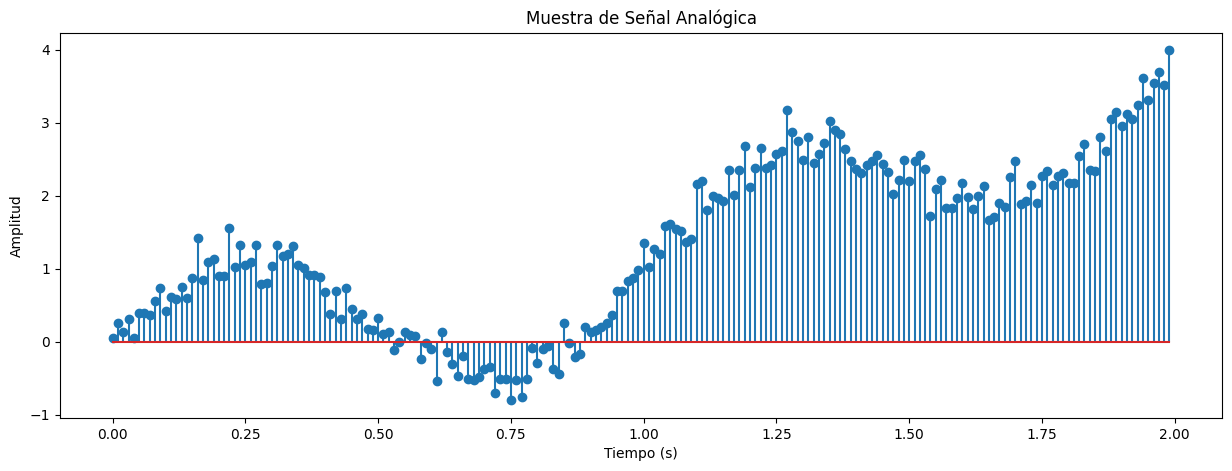

In [75]:
# graficar de la señal
plt.figure(figsize=(15, 5))  # establecer tamaño de la figura
plt.stem(time, analog_signal)  # graficar el tallo de la señal analógica
plt.title('Muestra de Señal Analógica')  # título del gráfico
plt.xlabel('Tiempo (s)')  # etiqueta del eje X
plt.ylabel('Amplitud')  # etiqueta del eje Y
plt.show()  # mostrar el gráfico


## Nivel De Cuantificacion
![NivelDeCuantificacion](./img/nivelesDeCuantificación.png)
#
Tomado de: *Fundamentos de sistemas digitales, 9a edición, www.librosite.net/floyd*

## Cuantificar la señal a n bits

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, IntSlider

# Suponiendo que `time` y `analog_signal` ya están definidos
# Define aquí tu señal analógica y el vector de tiempo correspondiente.

def plot_quantized_signal_with_levels(n_bits, sampling_interval):
    signal_min = np.min(analog_signal)
    signal_max = np.max(analog_signal)
    signal_range = signal_max - signal_min

    n_levels = 2 ** n_bits

    normalized_signal = (analog_signal - signal_min) / signal_range
    quantized_signal = np.round(normalized_signal * (n_levels - 1))
    
    sampled_time = time[::sampling_interval]
    sampled_quantized_signal = quantized_signal[::sampling_interval]
    print("sampling_interval es 1, se toman todos los elementos; si es 2, se toma cada segundo elemento; si es 10, cada décimo elemento, y así sucesivamente.")

    # print(sampled_quantized_signal * signal_range / (n_levels - 1) + signal_min)

    fig, ax1 = plt.subplots(figsize=(16, 5))
    
    ax1.plot(time, analog_signal, label='Señal Análoga', alpha=0.5)  # Señal análoga en el eje principal
    ax1.step(sampled_time, sampled_quantized_signal * signal_range / (n_levels - 1) + signal_min, where='mid', label='Señal Digital Cuantificada', linewidth=2)
    
    ax1.set_xlabel('Tiempo (s)')
    ax1.set_ylabel('Amplitud', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.grid(True)
    
    # Crear un segundo eje y para los niveles de cuantificación
    ax2 = ax1.twinx()  
    ax2.set_ylabel('Niveles', color='tab:red')  
    ax2.tick_params(axis='y', labelcolor='tab:red')
    
    # Ajustar el rango del segundo eje para que coincida con los niveles de cuantificación
    ax2.set_ylim(0, n_levels - 1)
    
    fig.tight_layout()  # Ajuste de diseño para evitar la superposición
    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
    plt.title(f'Comparación de Señal Análoga y Digital Cuantificada\n{n_levels} niveles, Número de muestras: {sampled_quantized_signal.shape}')
    plt.show()

n_bits_slider = IntSlider(min=1, max=16, step=1, value=8)
sampling_interval_slider = IntSlider(min=1, max=200, step=1, value=1)   # Ajusta según la necesidad

interactive_plot = interactive(plot_quantized_signal_with_levels, n_bits=n_bits_slider, sampling_interval=sampling_interval_slider)
output = interactive_plot.children[-1]
# output.layout.height = '500px'
interactive_plot


interactive(children=(IntSlider(value=8, description='n_bits', max=16, min=1), IntSlider(value=1, description=…

## Convertir señal cuantificada a representación binaria

In [77]:
import numpy as np

# Cuantificación
# Número de bits para la cuantificación
n_bits = 8
# Número de niveles de cuantificación basado en el número de bits
n_levels = 2 ** n_bits
# Encontrar el valor mínimo y máximo de la señal analógica
min_val = np.min(analog_signal)
max_val = np.max(analog_signal)
# Escalar la señal al rango de 0 a (n_levels - 1)
quantized_signal = np.round(((analog_signal - min_val) / (max_val - min_val)) * (n_levels - 1)).astype(int)

# Convertir señal cuantificada a representación binaria
bit_representation = [np.binary_repr(sample, width=n_bits) for sample in quantized_signal]

quantized_signal.shape, bit_representation[:5]  # Mostrar forma de la señal cuantificada y los primeros 5 bits


((200,), ['00101110', '00111000', '00110010', '00111011', '00101101'])

## Representación de Bits de la Señal Cuantificada

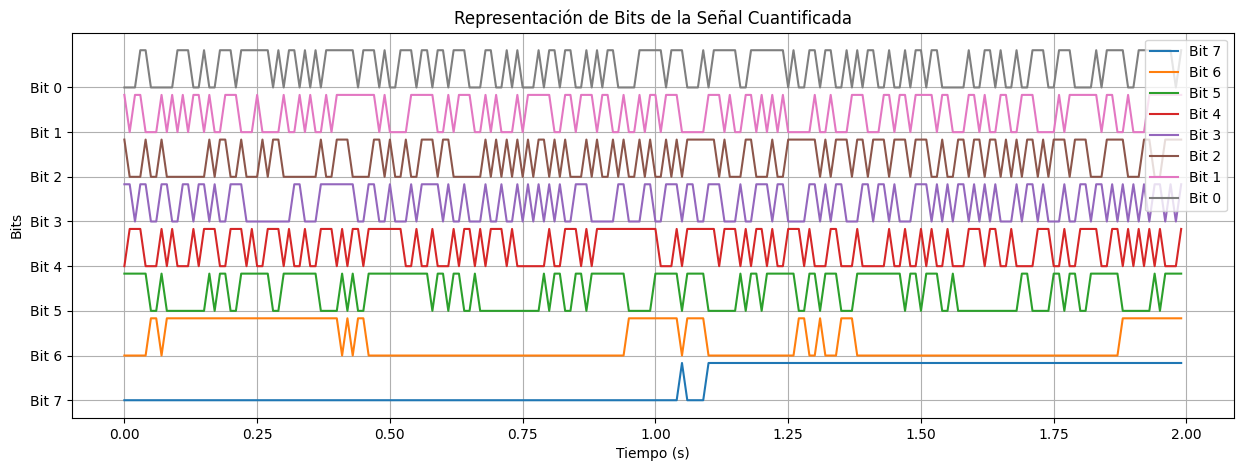

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Asumiendo que analog_signal y time ya están definidos

# Cuantificación
n_bits = 8
n_levels = 2 ** n_bits
min_val = np.min(analog_signal)
max_val = np.max(analog_signal)
quantized_signal = np.round(((analog_signal - min_val) / (max_val - min_val)) * (n_levels - 1)).astype(int)

# Convertir señal cuantificada a representación binaria
bit_representation = [np.binary_repr(sample, width=n_bits) for sample in quantized_signal]

# Crear matriz para representación de bits
bit_matrix = np.zeros((len(quantized_signal), n_bits))
for i, bits in enumerate(bit_representation):
    bit_matrix[i, :] = list(map(int, bits))

# Graficar
fig, ax = plt.subplots(figsize=(15, 5))
for i in range(n_bits):
    # Graficar cada bit como una línea distinta
    ax.plot(time, bit_matrix[:, i] + i * 1.2, label=f'Bit {n_bits-i-1}')  # Offset agregado para separar las líneas

ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Bits')
ax.set_yticks(np.arange(n_bits) * 1.2)
ax.set_yticklabels([f'Bit {n_bits-i-1}' for i in range(n_bits)])
ax.set_title('Representación de Bits de la Señal Cuantificada')
ax.legend()
plt.grid(True)
plt.show()



## RECONSTRUCCIÓN DIGITAL - ANÁLOGA 

## Diagrama De Bloques Conversión AD - DA
![DiagramaDeBloques](./img/DiagramaDeBloques.png)
Tomado de: *Fundamentos de sistemas digitales, 9a edición, www.librosite.net/floyd*
## Fórmula general de reconstrucción 

![General Reconstruction Formula (I)](./img/GeneralReconstructionFormula(I).png)
#
Tomado de: *Notas de clase*

## Simulate sampling and holding

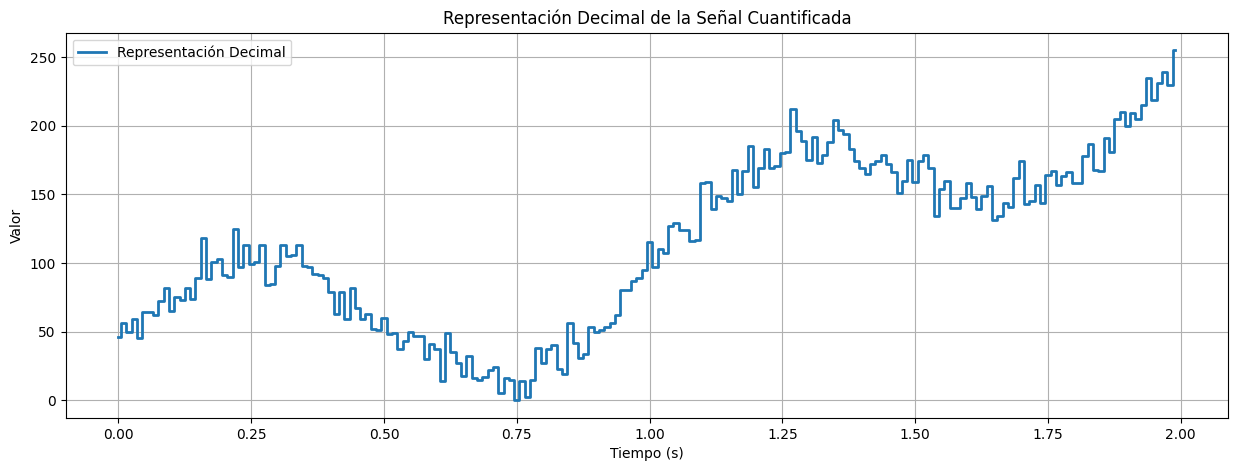

In [79]:
# bit_representation a decimal 
# Convertir la representación de bits a decimal
decimal_representation = [int(bits, 2) for bits in bit_representation]

# Graficar
fig, ax = plt.subplots(figsize=(15, 5))
ax.step(time, decimal_representation, label='Representación Decimal', where='mid', linewidth=2)

ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Valor')
ax.set_title('Representación Decimal de la Señal Cuantificada')
ax.legend()
plt.grid(True)
plt.show()

sampling_indices:
[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190]
(20,)


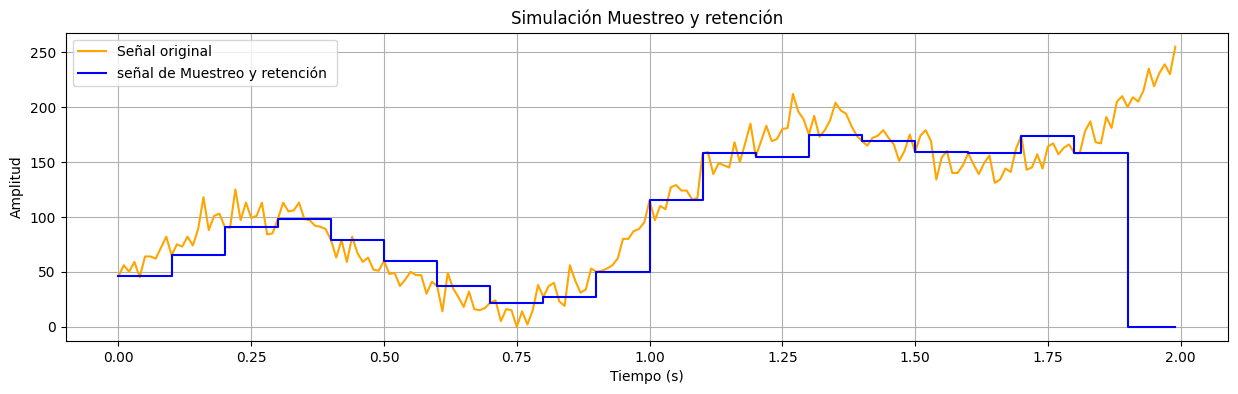

In [80]:
# Simulate sampling and holding
sampling_period = 0.1  # seconds
sampling_indices = np.arange(0, len(time), int(sampling_period * sampling_rate))
sampled_signal = np.zeros_like(decimal_representation)

for i in range(len(sampling_indices)-1):
    sampled_signal[sampling_indices[i]:sampling_indices[i+1]] = decimal_representation[sampling_indices[i]]

print("sampling_indices:")
print(sampling_indices)
print(sampling_indices.shape)
# Visualize original signal and sampled and held signal
plt.figure(figsize=(15, 4))
plt.plot(time, decimal_representation, label='Señal original', color='orange')
plt.step(time, sampled_signal, where='post', label='señal de Muestreo y retención ', color='blue')
plt.title('Simulación Muestreo y retención')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()



## Comportamiento de la frecuencia de la señal

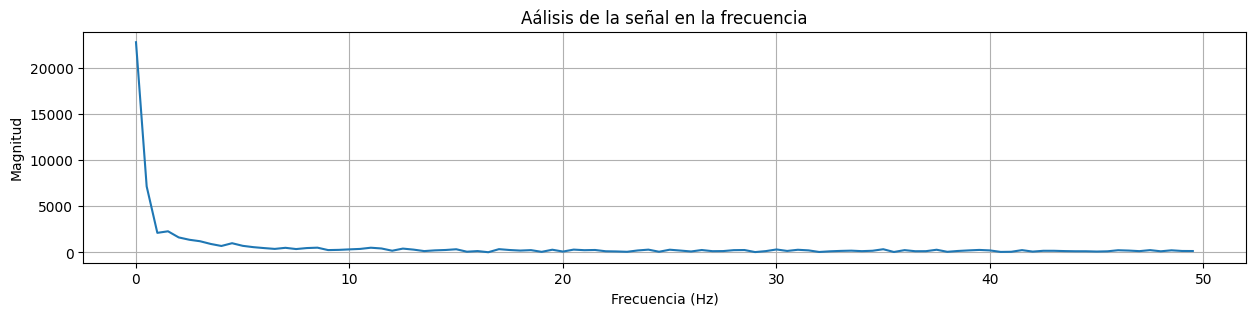

In [81]:
import numpy as np
from numpy.fft import fft, fftfreq
import matplotlib.pyplot as plt

# Re-define the signal parameters and generate the analog signal (sinusoidal)
frequency = 1  # The signal's frequency in Hertz (Hz)
sampling_rate = 100  # The sampling rate in Hertz (Hz)
duration = 2  # The duration of the signal in seconds
time = np.arange(0, duration, 1/sampling_rate)  # Create a time vector
# analog_signal = np.sin(2 * np.pi * frequency * time) + np.random.normal(0, 0.2, len(time)) + time**2

# Calculate the FFT of the signal
fft_result = fft(decimal_representation)  # Perform the Fast Fourier Transform on the signal
# Calculate the frequencies for the FFT components
frequencies = fftfreq(len(time), 1/sampling_rate)  # Get the corresponding frequency vector

# Take the magnitude of the FFT and frequencies (only half, as it is symmetric and conjugated)
n = len(time)
fft_magnitude = np.abs(fft_result)[:n // 2]  # Calculate the magnitude of the FFT (only half is needed due to symmetry)
frequencies = frequencies[:n // 2]  # Adjust the frequency vector to match the FFT magnitude

# Plot the FFT magnitude vs. frequencies
plt.figure(figsize=(15, 3))  # Set the figure size
plt.plot(frequencies, fft_magnitude)  # Plot the FFT magnitude versus frequencies
plt.title('Aálisis de la señal en la frecuencia')  # Graph title
plt.xlabel('Frecuencia (Hz)')  # X-axis label
plt.ylabel('Magnitud')  # Y-axis label
plt.grid(True)  # Show grid
plt.show()  # Display the graph


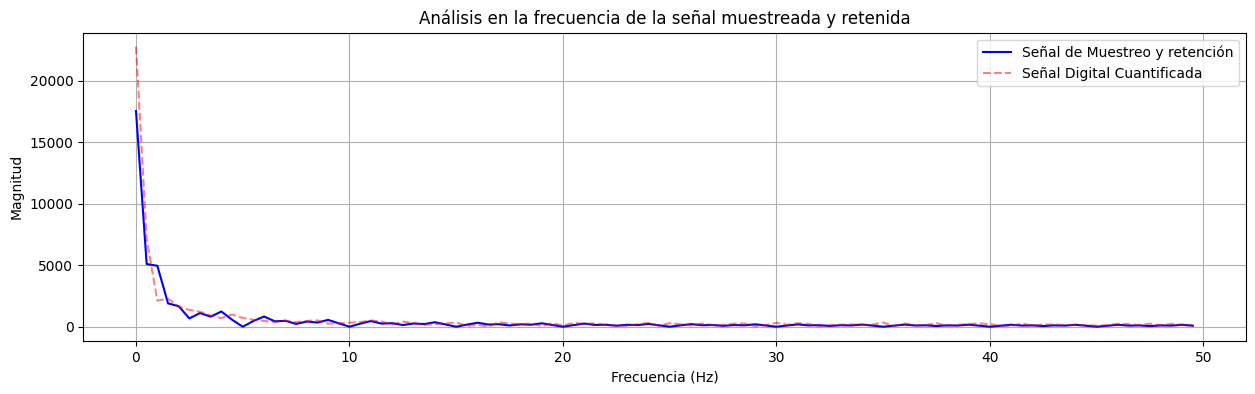

In [82]:
# Generate the sampled and held signal with the specified sampling period
sampling_period = 0.20  # seconds
sampling_indices = np.arange(0, len(time), int(sampling_period * sampling_rate))
sampled_signal = np.zeros_like(decimal_representation)

for i in range(len(sampling_indices)-1):
    sampled_signal[sampling_indices[i]:sampling_indices[i+1]] = decimal_representation[sampling_indices[i]]

# Calculate the FFT of the sampled and held signal
fft_result_sampled = fft(sampled_signal)
# Calculate the frequencies for the FFT components of the sampled and held signal
frequencies_sampled = fftfreq(len(time), 1/sampling_rate)

# Take the magnitude of the FFT and frequencies (only half, as it is symmetric and conjugated)
fft_magnitude_sampled = np.abs(fft_result_sampled)[:n // 2]
frequencies_sampled = frequencies_sampled[:n // 2]

# Plot the FFT magnitude vs. frequencies for the sampled and held signal
plt.figure(figsize=(15, 4))
plt.plot(frequencies_sampled, fft_magnitude_sampled, label='Señal de Muestreo y retención', color='blue')
# Add fft_magnitude of the original signal for comparison
plt.plot(frequencies, fft_magnitude, label='Señal Digital Cuantificada', alpha=0.5, linestyle='--', color='r')
plt.title('Análisis en la frecuencia de la señal muestreada y retenida')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.legend()
plt.show()
